## Importing Libraries and Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download the NLTK stemmer data
nltk.download("punkt")
# Download the NLTK lemmatizer data
nltk.download("wordnet")
# Download the stop words
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to /home/mmk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mmk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mmk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
sns.set_style('darkgrid')

In [7]:
def stem_token(token):
    stemmer = PorterStemmer()
    return stemmer.stem(token)


def lemmatize_token(token):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(token)

In [8]:
df_original = pd.read_csv("Transaction_Naration_Data_Set.csv")

In [ ]:
print("Shape: ", df_original.shape)
print("Info:\n", df_original.info())

Shape:  (22546758, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22546758 entries, 0 to 22546757
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   AC_ID       int64  
 2   AMOUNT      float64
 3   DOC_DATE    object 
 4   NARATION    object 
 5   DR_CR       object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ GB
Info:
 None


In [9]:
# Randomly select 10000 rows from the DataFrame
df = df_original.sample(n=10000)
display(df.head())

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR
14767883,14767883,904831,3000.0,23-FEB-23,Project (Social Safety Net Payment) Payment to...,Credit
4375287,4375287,81778,2164.0,30-NOV-22,Debit Against Company Fund Collection (MetLife...,Debit
17560796,17560796,510793,20000.0,20-MAR-23,Cash Withdraw,Debit
2523931,2523931,3955754,1000.0,10-NOV-22,Cash Deposit,Credit
20500119,20500119,570529,10.0,16-APR-23,Debit Against Debit Card Charge Transaction,Debit


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14767883 to 9662654
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   AC_ID       10000 non-null  int64  
 2   AMOUNT      10000 non-null  float64
 3   DOC_DATE    10000 non-null  object 
 4   NARATION    10000 non-null  object 
 5   DR_CR       10000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 546.9+ KB


In [11]:
# drop the index column
df = df.drop(columns=["Unnamed: 0"])

In [12]:
# converting DOC_DATE to datetime object
df["DOC_DATE"] = pd.to_datetime(df["DOC_DATE"])

# converting NARATION and DR_CR to string
df["NARATION"] = df["NARATION"].astype(str)
df["DR_CR"] = df["DR_CR"].astype(str)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14767883 to 9662654
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   AC_ID     10000 non-null  int64         
 1   AMOUNT    10000 non-null  float64       
 2   DOC_DATE  10000 non-null  datetime64[ns]
 3   NARATION  10000 non-null  object        
 4   DR_CR     10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 468.8+ KB


In [14]:
df.NARATION.value_counts()

Cash withdraw from Micro Merchant point, MM A/C                                                                                             1088
Cash Withdrawal From A/C No.:                                                                                                               1027
Credit Against Merchant Cash Withdraw Service From A/C-                                                                                     1018
Debit Against Palli Bidyut Bill Collection.                                                                                                  998
Cash Withdraw                                                                                                                                875
                                                                                                                                            ... 
EFTN Transaction, Janata Bank Ltd., BANCHARAMPUR, A/C:                                                                            

In [15]:
df.DR_CR.value_counts()

Debit     6163
Credit    3837
Name: DR_CR, dtype: int64

## Text Preprocessing

In [16]:
# Lowercasing
df["NARATION"] = df["NARATION"].str.lower()

In [17]:
# Removing special characters
df["NARATION"] = df["NARATION"].str.replace(r"[^a-zA-Z\s]", "", regex=True)

In [18]:
# Removing punctuations
df["NARATION"] = df["NARATION"].str.replace(r"[^\w\s]", "", regex=True)

In [19]:
# Tokenization on cleaned text
df["NARATION_tokens"] = df["NARATION"].str.split()

In [20]:
# Stemming
df["stemmed_tokens"] = df["NARATION_tokens"].apply(
    lambda tokens: [stem_token(token) for token in tokens]
)

In [21]:
# Lemmatization
df["lemmatized_tokens"] = df["NARATION_tokens"].apply(
    lambda tokens: [lemmatize_token(token) for token in tokens]
)

In [22]:
# Removing stop words from the 'stemmed_tokens' column
df["stemmed_tokens"] = df["stemmed_tokens"].apply(
    lambda tokens: [token for token in tokens if token not in stop_words]
)

In [23]:
# Removing stop words from the 'lemmatized_tokens' column
df["lemmatized_tokens"] = df["lemmatized_tokens"].apply(
    lambda tokens: [token for token in tokens if token not in stop_words]
)

In [24]:
df.head()

,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR,NARATION_tokens,stemmed_tokens,lemmatized_tokens
14767883,904831,3000.0,2023-02-23,project social safety net payment payment to ac,Credit,"[project, social, safety, net, payment, paymen...","[project, social, safeti, net, payment, paymen...","[project, social, safety, net, payment, paymen..."
4375287,81778,2164.0,2022-11-30,debit against company fund collection metlife ...,Debit,"[debit, against, company, fund, collection, me...","[debit, compani, fund, collect, metlif, alico]","[debit, company, fund, collection, metlife, al..."
17560796,510793,20000.0,2023-03-20,cash withdraw,Debit,"[cash, withdraw]","[cash, withdraw]","[cash, withdraw]"
2523931,3955754,1000.0,2022-11-10,cash deposit,Credit,"[cash, deposit]","[cash, deposit]","[cash, deposit]"
20500119,570529,10.0,2023-04-16,debit against debit card charge transaction,Debit,"[debit, against, debit, card, charge, transact...","[debit, debit, card, charg, transact]","[debit, debit, card, charge, transaction]"


## Frequency of Tokens

<AxesSubplot: >

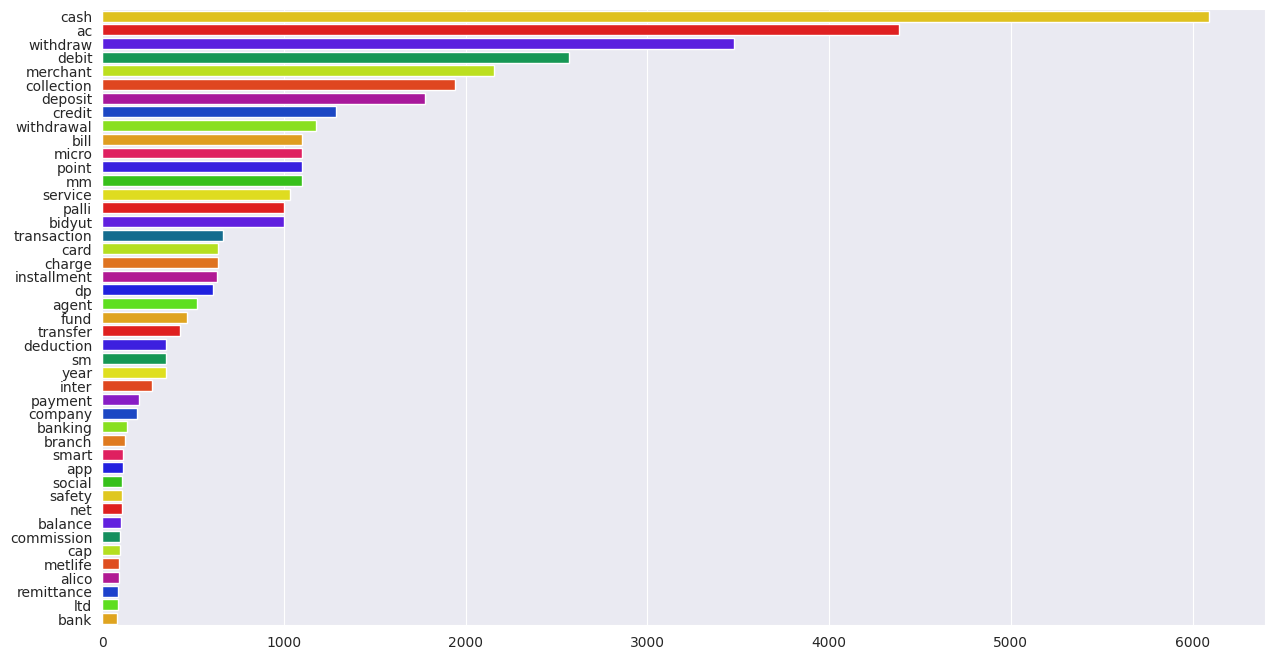

In [29]:
all_tokens = []

# Iterate over each list of tokens in df['lemmatized_tokens']
for token_list in df['lemmatized_tokens']:
    # Iterate over each token in the list and append it to all_tokens
    for token in token_list:
        all_tokens.append(token)

from collections import Counter, OrderedDict
occurrences = dict(Counter(all_tokens))
sorted_occurrences = OrderedDict(sorted(occurrences.items(), key=lambda x: x[1], reverse=True))

fig, axes = plt.subplots(1, figsize=(15,8))
sns.barplot(y = list(sorted_occurrences.keys())[:45], x = list(sorted_occurrences.values())[:45], ax = axes, palette='prism_r')
    

## Word to vec

In [32]:
from gensim.models import Word2Vec

sentences = df['lemmatized_tokens'].tolist()
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [33]:
document_vectors = []
for tokens in sentences:
    # Initialize an empty vector
    doc_vector = []
    for token in tokens:
        if token in model.wv:
            # Retrieve the word vector for the token
            word_vector = model.wv[token]
            # Append the word vector to the document vector
            doc_vector.append(word_vector)
    
    if len(doc_vector) > 0:
        # Calculate the mean vector for the document
        mean_vector = sum(doc_vector) / len(doc_vector)
        # Append the mean vector to the list of document vectors
        document_vectors.append(mean_vector)

In [36]:
# sanity check 
len(document_vectors)

10000

## Clustering

In [45]:
k = 10

In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k)
kmeans.fit(document_vectors)
cluster_labels = kmeans.labels_

df['cluster_label'] = cluster_labels
cluster_counts = df['cluster_label'].value_counts()

In [47]:
cluster_counts

4    2991
1    2949
2    1027
6     627
5     626
0     594
9     429
3     350
7     294
8     113
Name: cluster_label, dtype: int64

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for cluster_label in range(k):
    cluster_transactions = df[df['cluster_label'] == cluster_label]['NARATION_tokens'].tolist()
    all_words = [word for tokens in cluster_transactions for word in tokens]

    font_path = '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf'
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(' '.join(all_words))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {cluster_label} Word Cloud")
    plt.axis('off')
    plt.show()

ValueError: Only supported for TrueType fonts